In [223]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
int_url = 'https://dota-match-ids.s3.amazonaws.com/promatch_csvs/international_promatch_data.csv'
int_df = pd.read_csv(int_url)

In [3]:
int_df.head()

,Unnamed: 0,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True
1,1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False
2,2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False
3,3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True
4,4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False


In [4]:
prem_url = 'https://dota-match-ids.s3.amazonaws.com/promatch_csvs/premier_promatch_data.csv'
prem_df = pd.read_csv(prem_url)
prem_df.head()

,Unnamed: 0,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True
1,1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False
2,2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False
3,3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True
4,4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False


In [5]:
pro_url = 'https://dota-match-ids.s3.amazonaws.com/promatch_csvs/professional_promatch_data.csv'
pro_df = pd.read_csv(pro_url)
pro_df.head()

,Unnamed: 0,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,0,5108885702,2665,1573480047,7314697.0,FIVE BROTHERS,7359442.0,Team Aspirations,11382,Asian DOTA2 Gold Occupation Competition,385455.0,1.0,57,38,True
1,1,5108800438,2855,1573476138,7408440.0,Look For Smile,7467648.0,Punch gaming,11382,Asian DOTA2 Gold Occupation Competition,385449.0,1.0,41,61,False
2,2,5108735167,2326,1573473148,7467648.0,Punch gaming,7408440.0,Look For Smile,11382,Asian DOTA2 Gold Occupation Competition,385443.0,1.0,42,31,True
3,3,5108711156,2619,1573471726,7253435.0,Team Galaxy,6634461.0,Team Sincere,11263,Masters Tournament,385430.0,1.0,39,44,False
4,4,5108703089,1431,1573471276,7443956.0,Black Knight,7451388.0,LieYing Team,11407,Elite Cup Season 2,385436.0,1.0,16,41,False


### First thing that we will fix here is that first "Unnamed" column which works as an index. However, now we can use the index available by default in a pandas dataframe

In [6]:
int_df.drop('Unnamed: 0',axis=1,inplace=True)
prem_df.drop('Unnamed: 0', axis=1, inplace=True)
pro_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
int_df.describe()

,match_id,duration,start_time,radiant_team_id,dire_team_id,leagueid,series_id,series_type,radiant_score,dire_score
count,2.941000e+03,2941.000000,2.941000e+03,2.913000e+03,2.913000e+03,2941.000000,461.000000,461.000000,2941.000000,2941.000000
mean,2.602210e+09,2363.531792,1.472405e+09,1.847743e+06,1.843730e+06,12102.854131,337465.735358,0.685466,15.048623,14.817069
std,1.585322e+09,778.803494,6.469213e+07,1.975791e+06,2.004300e+06,18666.374329,70307.777521,0.577462,14.814638,14.820256
min,3.564340e+07,590.000000,1.345941e+09,2.000000e+00,2.000000e+00,600.000000,0.000000,0.000000,0.000000,0.000000
25%,1.481429e+09,1844.000000,1.431880e+09,5.500000e+01,4.600000e+01,2733.000000,346177.000000,0.000000,0.000000,0.000000
50%,2.551217e+09,2254.000000,1.470425e+09,1.375614e+06,1.375614e+06,5401.000000,347417.000000,1.000000,13.000000,12.000000
75%,3.967602e+09,2780.000000,1.529708e+09,2.640025e+06,2.672298e+06,10749.000000,358521.000000,1.000000,27.000000,27.000000
max,4.986462e+09,8430.000000,1.566734e+09,7.247587e+06,7.247949e+06,65006.000000,360940.000000,2.000000,63.000000,64.000000


### Questions about the data sets:
### Is the duration in seconds?
### Is it possible to tie? No

In [8]:
prem_df.league_name.unique()

array(['The International 2019', 'EPICENTER Major 2019',
       'MDL Disneyland® Paris Major', 'DreamLeague Season 11',
       'World Electronic Sports Games 2018-2019', 'The Chongqing Major',
       'The Kuala Lumpur Major', 'WePlay League Season 3',
       'The International 2018', '2017 Mars Dota 2 League',
       'CHINA DOTA2 SUPER MAJOR',
       'ESL One Birmingham 2018 powered by Intel', 'MDL Changsha ',
       'EPICENTER XL', 'Dota2 Asia Championships 2018',
       'DreamLeague season 8', 'ESL One Katowice 2018 powered by Intel',
       'SL i-League Invitational Season 3', 'The Summit 5',
       'ESL One Hamburg 2017', 'The International 2017',
       'NESO 4th National E-Sports ShenZhen Open Tournament- Galaxy Battles',
       'EPICENTER: Moscow Season 2', 'Zotac Cup Masters', 'Kiev Major',
       'Dota 2 Asia Championships 2017', 'Dota Pit League Season Five',
       'ESL One Genting 2017', 'World Cyber Arena 2016 Grand Finals',
       'ESL One Frankfurt 2016',
       'Norther

In [9]:
pro_df.league_name.unique()

array(['Asian DOTA2 Gold Occupation  Competition', 'Masters  Tournament',
       'Elite Cup Season 2', 'AEF Dota 2 Premier League Season 3',
       'JBO亚洲大师赛S2', 'Dotabuff Reach - Pinnacle Division', 'God联赛',
       'Dota Summit 11', 'YouTube SIVVIT - Big Russian Show',
       'Bautumn Major', 'Season 4 2019: LPL Challenger Dota 2',
       '中国DOTA2职业联赛', 'MHR CUP Season 1', 'SECTOR ESPORTS',
       ' Russian League', 'QUICK DotA2 Thailand League', '中国DOTA2发展联赛',
       'Movistar Liga Pro Gaming Season 1',
       'Season 4 2019: LPL PRO Dota 2', 'Parimatch League Season 1',
       ' Hainan  Master League ', 'Orbium', 'ASIA CHALLENGER LEAGUE',
       'VyrDota League by GUMANTAR', 'Phantom League 2da Edición',
       'ESL One Hamburg 2019 powered by Intel',
       'ESL Clash of Nations Bangkok 2019, presented by Mercedes-Benz',
       'Rostovskiy Tournament', 'Bishkek Stars League #8', 'RED STAR CUP',
       'Elite Cup', 'ESL India Premiership 2019 - Masters League',
       'Indonesia Esp

In [10]:
int_df.dtypes

match_id             int64
duration             int64
start_time           int64
radiant_team_id    float64
radiant_name        object
dire_team_id       float64
dire_name           object
leagueid             int64
league_name         object
series_id          float64
series_type        float64
radiant_score        int64
dire_score           int64
radiant_win           bool
dtype: object

In [11]:
int_df.league_name.unique()

array(['The International 2019', 'The International 2018',
       'The International 2017', 'The International 2016',
       'The International 2015', 'The International 2014',
       'The International 2013 Pass', 'The International 2012'],
      dtype=object)

In [12]:
bint_df = pd.read_csv('https://dota-match-ids.s3.amazonaws.com/raw_match_csvs/international_raw_match_1000.csv')

In [13]:
bint_df.head()

,Unnamed: 0,Unnamed: 0.1,barracks_status_dire,barracks_status_radiant,cluster,cosmetics,dire_score,dire_team,draft_timings,duration,...,radiant_xp_adv,region,series_id,series_type,skill,start_time,throw,tower_status_dire,tower_status_radiant,version
0,2799,949.0,3,63,111,{},0,"{'team_id': 2, 'name': 'Zenith', 'tag': 'Zenit...",NaN,1938,...,[],1.0,0,0,NaN,1346562896,NaN,1540,1980,20.0
1,2,2.0,63,3,308,"{'647': 4, '4092': 1, '4515': 131, '5239': 1, ...",40,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",1945,...,"[0, 89, -85, 399, 262, 329, -4, 327, 132, 289,...",NaN,360940,2,NaN,1566726706,NaN,2038,1540,21.0
2,2313,463.0,63,11,111,{},0,"{'team_id': 5, 'name': 'INVICTUS GAMING', 'tag...",[],2616,...,[],1.0,0,0,NaN,1405034590,NaN,1968,1540,21.0
3,253,253.0,63,48,137,"{'647': 4, '4377': 3, '4379': 3, '4380': 3, '5...",41,"{'team_id': 5059375, 'name': 'The Final Tribe'...","[{'active_team': 2,\n 'extra_time': 130,\n 'he...",2504,...,"[0, 232, 37, -270, -106, -310, 153, -593, -100...",3.0,347208,0,NaN,1562947093,NaN,2046,1792,21.0
4,1437,1437.0,63,3,113,"{'4207': 131, '4208': 131, '4209': 131, '4359'...",34,"{'team_id': 4, 'name': 'EHOME', 'tag': 'EHOME'...","[{'active_team': 3,\n 'extra_time': 130,\n 'he...",2213,...,"[0, -56, 12, 165, 630, 461, 784, 34, 242, -39,...",1.0,83089,1,NaN,1470768182,NaN,2038,1540,21.0


#### I want to analyze the data that just corresponds to the international cups (int_df)

In [14]:
int_df.head()

,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True
1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False
2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False
3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True
4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False


In [15]:
int_df.describe()

,match_id,duration,start_time,radiant_team_id,dire_team_id,leagueid,series_id,series_type,radiant_score,dire_score
count,2.941000e+03,2941.000000,2.941000e+03,2.913000e+03,2.913000e+03,2941.000000,461.000000,461.000000,2941.000000,2941.000000
mean,2.602210e+09,2363.531792,1.472405e+09,1.847743e+06,1.843730e+06,12102.854131,337465.735358,0.685466,15.048623,14.817069
std,1.585322e+09,778.803494,6.469213e+07,1.975791e+06,2.004300e+06,18666.374329,70307.777521,0.577462,14.814638,14.820256
min,3.564340e+07,590.000000,1.345941e+09,2.000000e+00,2.000000e+00,600.000000,0.000000,0.000000,0.000000,0.000000
25%,1.481429e+09,1844.000000,1.431880e+09,5.500000e+01,4.600000e+01,2733.000000,346177.000000,0.000000,0.000000,0.000000
50%,2.551217e+09,2254.000000,1.470425e+09,1.375614e+06,1.375614e+06,5401.000000,347417.000000,1.000000,13.000000,12.000000
75%,3.967602e+09,2780.000000,1.529708e+09,2.640025e+06,2.672298e+06,10749.000000,358521.000000,1.000000,27.000000,27.000000
max,4.986462e+09,8430.000000,1.566734e+09,7.247587e+06,7.247949e+06,65006.000000,360940.000000,2.000000,63.000000,64.000000


In [16]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 14 columns):
match_id           2941 non-null int64
duration           2941 non-null int64
start_time         2941 non-null int64
radiant_team_id    2913 non-null float64
radiant_name       2787 non-null object
dire_team_id       2913 non-null float64
dire_name          2786 non-null object
leagueid           2941 non-null int64
league_name        2941 non-null object
series_id          461 non-null float64
series_type        461 non-null float64
radiant_score      2941 non-null int64
dire_score         2941 non-null int64
radiant_win        2941 non-null bool
dtypes: bool(1), float64(4), int64(6), object(3)
memory usage: 301.6+ KB


#### Some matches do not have any radiant_name or dire_name. Let's see whats'up with them.

In [17]:
int_df[int_df.dire_name.isna() | int_df.radiant_name.isna()]

,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
221,4901728834,2044,1563040412,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,22,15,True
222,4901646019,1659,1563036878,NaN,NaN,7203342.0,Chaos Esports Club,10749,The International 2019,0.0,0.0,12,24,False
227,4901024942,1771,1563016887,3214090.0,Hippomaniacs,NaN,NaN,10749,The International 2019,0.0,0.0,24,18,True
229,4900882659,3234,1563012042,NaN,NaN,3214090.0,Hippomaniacs,10749,The International 2019,0.0,0.0,47,40,False
246,4899849741,2759,1562958602,NaN,NaN,7247587.0,Anti-MagE-,10749,The International 2019,0.0,0.0,33,22,True
251,4899699117,1598,1562951811,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,24,8,True
256,4899277798,2261,1562939098,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,27,11,True
259,4899109599,1982,1562934379,NaN,NaN,NaN,NaN,10749,The International 2019,0.0,0.0,10,25,False
262,4898997090,1658,1562930757,NaN,NaN,7203342.0,Chaos Esports Club,10749,The International 2019,0.0,0.0,4,23,False
264,4898917433,2501,1562927868,NaN,NaN,7247587.0,Anti-MagE-,10749,The International 2019,0.0,0.0,36,41,False


#### It looks as if the matches that have any nan team were one by default by whatever team did show up. Let's see if there are any matches in which none of the teams showed up

In [18]:
int_df[int_df.dire_name.isna() & int_df.radiant_name.isna()]

,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
259,4899109599,1982,1562934379,NaN,NaN,NaN,NaN,10749,The International 2019,0.0,0.0,10,25,False
312,4897134944,2353,1562844262,NaN,NaN,NaN,NaN,10749,The International 2019,0.0,0.0,23,49,False
313,4897082996,3780,1562842436,NaN,NaN,NaN,NaN,10749,The International 2019,0.0,0.0,38,38,False
1268,3276818595,2325,1498550491,4429098.0,NaN,4100699.0,NaN,5401,The International 2017,NaN,NaN,30,22,True
1352,3275689511,3714,1498492310,2790766.0,NaN,4100699.0,NaN,5401,The International 2017,NaN,NaN,42,48,True
1371,3275178718,1255,1498477388,2790766.0,NaN,4429098.0,NaN,5401,The International 2017,NaN,NaN,10,30,False
1673,2463943541,1556,1466960459,2677025.0,NaN,2791077.0,NaN,4664,The International 2016,NaN,NaN,19,9,True
2198,1481969424,1295,1431900435,NaN,NaN,NaN,NaN,2733,The International 2015,NaN,NaN,0,0,False
2199,1481893141,2798,1431896096,NaN,NaN,NaN,NaN,2733,The International 2015,NaN,NaN,0,0,True
2200,1481827290,1614,1431893036,NaN,NaN,NaN,NaN,2733,The International 2015,NaN,NaN,0,0,True


#### There are some matches here which don't have any team id available. However, some of them do have both ids available. We can drop whatever matches don't have any ids available and keep the others.

In [19]:
int_df.dropna(subset=['radiant_team_id','dire_team_id'],how='all',inplace=True)

In [20]:
int_df[int_df.dire_name.isna() & int_df.radiant_name.isna()]

,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
1268,3276818595,2325,1498550491,4429098.0,NaN,4100699.0,NaN,5401,The International 2017,NaN,NaN,30,22,True
1352,3275689511,3714,1498492310,2790766.0,NaN,4100699.0,NaN,5401,The International 2017,NaN,NaN,42,48,True
1371,3275178718,1255,1498477388,2790766.0,NaN,4429098.0,NaN,5401,The International 2017,NaN,NaN,10,30,False
1673,2463943541,1556,1466960459,2677025.0,NaN,2791077.0,NaN,4664,The International 2016,NaN,NaN,19,9,True
2598,657140538,2638,1399940026,720700.0,NaN,94968.0,NaN,600,The International 2014,NaN,NaN,0,0,False


#### However, these matches still have missing features such as the series_id and the series_type. We will figure this out later. First let's go back to figuring out what happened to the matches that have a missing team in them

In [21]:
int_df[int_df.dire_name.isna() | int_df.radiant_name.isna()]

,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
221,4901728834,2044,1563040412,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,22,15,True
222,4901646019,1659,1563036878,NaN,NaN,7203342.0,Chaos Esports Club,10749,The International 2019,0.0,0.0,12,24,False
227,4901024942,1771,1563016887,3214090.0,Hippomaniacs,NaN,NaN,10749,The International 2019,0.0,0.0,24,18,True
229,4900882659,3234,1563012042,NaN,NaN,3214090.0,Hippomaniacs,10749,The International 2019,0.0,0.0,47,40,False
246,4899849741,2759,1562958602,NaN,NaN,7247587.0,Anti-MagE-,10749,The International 2019,0.0,0.0,33,22,True
251,4899699117,1598,1562951811,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,24,8,True
256,4899277798,2261,1562939098,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,27,11,True
262,4898997090,1658,1562930757,NaN,NaN,7203342.0,Chaos Esports Club,10749,The International 2019,0.0,0.0,4,23,False
264,4898917433,2501,1562927868,NaN,NaN,7247587.0,Anti-MagE-,10749,The International 2019,0.0,0.0,36,41,False
290,4897970627,2567,1562872588,7237270.0,Bald,NaN,NaN,10749,The International 2019,0.0,0.0,28,29,False


#### First we want to convert the start_time series into something more human readable. We will rename this column to start_time_unix

In [25]:
int_df.rename(columns={'start_time':'start_time_unix'}, inplace=True)

#### We will create a new column which will show the unix timestamp converted to a regular datetime

In [27]:
int_df['start_time'] = pd.to_datetime(int_df.start_time_unix,unit='s')

In [28]:
int_df.head()

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True,2019-08-25 11:50:17
1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False,2019-08-25 10:54:19
2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False,2019-08-25 09:51:46
3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True,2019-08-25 08:33:12
4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False,2019-08-25 06:12:23


#### One more time let's see if the matches that have a missing team in them


In [29]:
int_df[int_df.dire_name.isna() | int_df.radiant_name.isna()]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
221,4901728834,2044,1563040412,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,22,15,True,2019-07-13 17:53:32
222,4901646019,1659,1563036878,NaN,NaN,7203342.0,Chaos Esports Club,10749,The International 2019,0.0,0.0,12,24,False,2019-07-13 16:54:38
227,4901024942,1771,1563016887,3214090.0,Hippomaniacs,NaN,NaN,10749,The International 2019,0.0,0.0,24,18,True,2019-07-13 11:21:27
229,4900882659,3234,1563012042,NaN,NaN,3214090.0,Hippomaniacs,10749,The International 2019,0.0,0.0,47,40,False,2019-07-13 10:00:42
246,4899849741,2759,1562958602,NaN,NaN,7247587.0,Anti-MagE-,10749,The International 2019,0.0,0.0,33,22,True,2019-07-12 19:10:02
251,4899699117,1598,1562951811,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,24,8,True,2019-07-12 17:16:51
256,4899277798,2261,1562939098,7203342.0,Chaos Esports Club,NaN,NaN,10749,The International 2019,0.0,0.0,27,11,True,2019-07-12 13:44:58
262,4898997090,1658,1562930757,NaN,NaN,7203342.0,Chaos Esports Club,10749,The International 2019,0.0,0.0,4,23,False,2019-07-12 11:25:57
264,4898917433,2501,1562927868,NaN,NaN,7247587.0,Anti-MagE-,10749,The International 2019,0.0,0.0,36,41,False,2019-07-12 10:37:48
290,4897970627,2567,1562872588,7237270.0,Bald,NaN,NaN,10749,The International 2019,0.0,0.0,28,29,False,2019-07-11 19:16:28


#### Let's analyze Team singularity's schedule since they have a game where the other team did not appear but the team still lost.

In [38]:
int_df[((int_df.radiant_name=='Team Singularity') | (int_df.dire_name=='Team Singularity')) & (int_df.league_name=='The International 2019')]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
253,4899564616,2504,1562947093,6711290.0,Team Singularity,5059375.0,The Final Tribe,10749,The International 2019,347208.0,0.0,12,41,False,2019-07-12 15:58:13
255,4899405483,2370,1562942542,6711290.0,Team Singularity,7247587.0,Anti-MagE-,10749,The International 2019,347187.0,0.0,34,32,False,2019-07-12 14:42:22
261,4899031001,2215,1562932027,6711290.0,Team Singularity,3214090.0,Hippomaniacs,10749,The International 2019,347116.0,0.0,24,31,False,2019-07-12 11:47:07
295,4897853305,2354,1562866772,6711290.0,Team Singularity,NaN,NaN,10749,The International 2019,0.0,0.0,10,25,False,2019-07-11 17:39:32
300,4897693892,2002,1562860426,6711290.0,Team Singularity,7237270.0,Bald,10749,The International 2019,346860.0,0.0,30,14,True,2019-07-11 15:53:46
304,4897433094,2795,1562853126,7203342.0,Chaos Esports Club,6711290.0,Team Singularity,10749,The International 2019,346817.0,0.0,17,44,False,2019-07-11 13:52:06
309,4897243939,2172,1562847697,6711290.0,Team Singularity,7247949.0,six eight two,10749,The International 2019,346803.0,0.0,24,7,True,2019-07-11 12:21:37


#### The match with a missing dire_team_id is against a team that has since disbanded which might explain why the database does not contain their data anymore. Let's see if there is a similar situation with other teams.

In [39]:
int_df[((int_df.radiant_name=='Chaos Esports Club') | (int_df.dire_name=='Chaos Esports Club')) & (int_df.league_name=='The International 2019')]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
60,4973073617,1776,1566100965,1838315.0,Team Secret,7203342.0,Chaos Esports Club,10749,The International 2019,359031.0,1.0,22,30,False,2019-08-18 04:02:45
64,4973017840,1305,1566097834,7203342.0,Chaos Esports Club,1838315.0,Team Secret,10749,The International 2019,359031.0,1.0,15,33,False,2019-08-18 03:10:34
76,4971714902,2762,1566041592,6214538.0,Newbee,7203342.0,Chaos Esports Club,10749,The International 2019,358760.0,1.0,39,19,True,2019-08-17 11:33:12
79,4971609890,2274,1566037624,6214538.0,Newbee,7203342.0,Chaos Esports Club,10749,The International 2019,358760.0,1.0,44,11,True,2019-08-17 10:27:04
89,4971343154,5189,1566027129,2108395.0,TNC Predator,7203342.0,Chaos Esports Club,10749,The International 2019,358726.0,1.0,26,40,False,2019-08-17 07:32:09
94,4971219200,3534,1566021957,2108395.0,TNC Predator,7203342.0,Chaos Esports Club,10749,The International 2019,358726.0,1.0,33,22,True,2019-08-17 06:05:57
108,4970976863,1781,1566008578,7203342.0,Chaos Esports Club,2626685.0,KEEN GAMING,10749,The International 2019,358678.0,1.0,8,30,False,2019-08-17 02:22:58
111,4970923478,1886,1566004595,2626685.0,KEEN GAMING,7203342.0,Chaos Esports Club,10749,The International 2019,358678.0,1.0,20,12,True,2019-08-17 01:16:35
124,4969641209,2826,1565947831,543897.0,Mineski,7203342.0,Chaos Esports Club,10749,The International 2019,358498.0,1.0,27,25,True,2019-08-16 09:30:31
128,4969560020,2328,1565943693,7203342.0,Chaos Esports Club,543897.0,Mineski,10749,The International 2019,358498.0,1.0,13,45,False,2019-08-16 08:21:33


#### The matches against missing teams which have since disbanded or which do not have much data available online (six eight two) such as roster, team hq, etc.
#### Filling every one of these teams would require a lot of cross validation between the official International League website and the data frame, and we do not have enough time. Also, we cannot leave these values in the table as they would act as noise; therefore, we will drop them.

In [41]:
int_df.dropna(subset=['dire_team_id','radiant_team_id'],how='any',inplace=True)

In [42]:
int_df.head()

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True,2019-08-25 11:50:17
1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False,2019-08-25 10:54:19
2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False,2019-08-25 09:51:46
3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True,2019-08-25 08:33:12
4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False,2019-08-25 06:12:23


In [43]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2937
Data columns (total 15 columns):
match_id           2891 non-null int64
duration           2891 non-null int64
start_time_unix    2891 non-null int64
radiant_team_id    2891 non-null float64
radiant_name       2765 non-null object
dire_team_id       2891 non-null float64
dire_name          2764 non-null object
leagueid           2891 non-null int64
league_name        2891 non-null object
series_id          442 non-null float64
series_type        442 non-null float64
radiant_score      2891 non-null int64
dire_score         2891 non-null int64
radiant_win        2891 non-null bool
start_time         2891 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 341.6+ KB


#### Even though there are some rows that do not have the team name, this does not matter much because we still have the team id which will help the algorithm identify the teams. Now we will focus on those missing series_id and series_type.

In [44]:
int_df[int_df.series_id.isna() | int_df.series_type.isna()]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
461,4080856812,2188,1535249730,15.0,PSG.LGD,2586976.0,OG,9870,The International 2018,NaN,NaN,34,35,False,2018-08-26 02:15:30
462,4080778303,3921,1535243738,15.0,PSG.LGD,2586976.0,OG,9870,The International 2018,NaN,NaN,58,49,False,2018-08-26 00:35:38
463,4080723031,2066,1535239468,2586976.0,OG,15.0,PSG.LGD,9870,The International 2018,NaN,NaN,25,50,False,2018-08-25 23:24:28
464,4080666526,2285,1535235390,15.0,PSG.LGD,2586976.0,OG,9870,The International 2018,NaN,NaN,45,19,True,2018-08-25 22:16:30
465,4080601137,2078,1535231302,2586976.0,OG,15.0,PSG.LGD,9870,The International 2018,NaN,NaN,34,27,True,2018-08-25 21:08:22
466,4080420268,1944,1535223496,15.0,PSG.LGD,39.0,Evil Geniuses,9870,The International 2018,NaN,NaN,32,18,True,2018-08-25 18:58:16
467,4080316101,2605,1535219083,39.0,Evil Geniuses,15.0,PSG.LGD,9870,The International 2018,NaN,NaN,21,41,False,2018-08-25 17:44:43
468,4078566725,2081,1535163554,39.0,Evil Geniuses,2163.0,Team Liquid,9870,The International 2018,NaN,NaN,39,21,True,2018-08-25 02:19:14
469,4078478649,3857,1535157660,39.0,Evil Geniuses,2163.0,Team Liquid,9870,The International 2018,NaN,NaN,53,40,True,2018-08-25 00:41:00
470,4078412913,3489,1535152122,2586976.0,OG,15.0,PSG.LGD,9870,The International 2018,NaN,NaN,33,40,True,2018-08-24 23:08:42


#### The series_id column indicates the series a matched was played in during a tournament/league.
#### The series_type column indicates if the game was a best of 1, 2/3 or 5
#### Interestingly, all of the games that have this issue are from 2018 and earlier.

In [45]:
int_df[['series_id','series_type']].describe()

,series_id,series_type
count,442.000000,442.000000
mean,351972.180995,0.714932
std,6221.894618,0.571590
min,345260.000000,0.000000
25%,346351.000000,0.000000
50%,347627.000000,1.000000
75%,358677.750000,1.000000
max,360940.000000,2.000000


#### In the case of the series_type missing features, most of the missing values correspond to games that were split into multiple 1 round games. Therefore, for the missing series_type we will fill them with 0.

In [46]:
int_df.series_type.fillna(0,inplace=True)

In [47]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2937
Data columns (total 15 columns):
match_id           2891 non-null int64
duration           2891 non-null int64
start_time_unix    2891 non-null int64
radiant_team_id    2891 non-null float64
radiant_name       2765 non-null object
dire_team_id       2891 non-null float64
dire_name          2764 non-null object
leagueid           2891 non-null int64
league_name        2891 non-null object
series_id          442 non-null float64
series_type        2891 non-null float64
radiant_score      2891 non-null int64
dire_score         2891 non-null int64
radiant_win        2891 non-null bool
start_time         2891 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 341.6+ KB


In [48]:
int_df[int_df.series_id.isna()]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
461,4080856812,2188,1535249730,15.0,PSG.LGD,2586976.0,OG,9870,The International 2018,NaN,0.0,34,35,False,2018-08-26 02:15:30
462,4080778303,3921,1535243738,15.0,PSG.LGD,2586976.0,OG,9870,The International 2018,NaN,0.0,58,49,False,2018-08-26 00:35:38
463,4080723031,2066,1535239468,2586976.0,OG,15.0,PSG.LGD,9870,The International 2018,NaN,0.0,25,50,False,2018-08-25 23:24:28
464,4080666526,2285,1535235390,15.0,PSG.LGD,2586976.0,OG,9870,The International 2018,NaN,0.0,45,19,True,2018-08-25 22:16:30
465,4080601137,2078,1535231302,2586976.0,OG,15.0,PSG.LGD,9870,The International 2018,NaN,0.0,34,27,True,2018-08-25 21:08:22
466,4080420268,1944,1535223496,15.0,PSG.LGD,39.0,Evil Geniuses,9870,The International 2018,NaN,0.0,32,18,True,2018-08-25 18:58:16
467,4080316101,2605,1535219083,39.0,Evil Geniuses,15.0,PSG.LGD,9870,The International 2018,NaN,0.0,21,41,False,2018-08-25 17:44:43
468,4078566725,2081,1535163554,39.0,Evil Geniuses,2163.0,Team Liquid,9870,The International 2018,NaN,0.0,39,21,True,2018-08-25 02:19:14
469,4078478649,3857,1535157660,39.0,Evil Geniuses,2163.0,Team Liquid,9870,The International 2018,NaN,0.0,53,40,True,2018-08-25 00:41:00
470,4078412913,3489,1535152122,2586976.0,OG,15.0,PSG.LGD,9870,The International 2018,NaN,0.0,33,40,True,2018-08-24 23:08:42


In [51]:
int_df.loc[450:465]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
450,4889233900,1971,1562488815,6765426.0,RESURGENCE,4817649.0,496 Gaming,10749,The International 2019,345331.0,0.0,15,37,False,2019-07-07 08:40:15
451,4889163811,2280,1562486344,543897.0,Mineski,7098928.0,Adroit,10749,The International 2019,345317.0,0.0,10,35,False,2019-07-07 07:59:04
452,4889115579,2116,1562484993,3785359.0,BOOM ID,6797380.0,AMPLFY,10749,The International 2019,345311.0,0.0,18,28,False,2019-07-07 07:36:33
453,4889038294,2629,1562482406,7225724.0,Team Jinesbrus,4817649.0,496 Gaming,10749,The International 2019,345300.0,0.0,37,34,True,2019-07-07 06:53:26
454,4888974952,1999,1562480552,3785359.0,BOOM ID,6765426.0,RESURGENCE,10749,The International 2019,345295.0,0.0,23,9,True,2019-07-07 06:22:32
455,4888936676,1937,1562479284,543897.0,Mineski,6797380.0,AMPLFY,10749,The International 2019,345286.0,0.0,22,13,True,2019-07-07 06:01:24
456,4888859291,1954,1562476841,3262331.0,Team EVOS,7098928.0,Adroit,10749,The International 2019,345281.0,1.0,16,26,False,2019-07-07 05:20:41
457,4888772755,3424,1562474035,6765426.0,RESURGENCE,6797380.0,AMPLFY,10749,The International 2019,345278.0,0.0,17,31,False,2019-07-07 04:33:55
458,4888732113,2595,1562472331,3262331.0,Team EVOS,4817649.0,496 Gaming,10749,The International 2019,345271.0,1.0,16,25,False,2019-07-07 04:05:31
459,4888686136,2053,1562470296,7098928.0,Adroit,7225724.0,Team Jinesbrus,10749,The International 2019,345265.0,1.0,8,20,False,2019-07-07 03:31:36


#### It looks like the series_id value only applies to the International Cup 2019. Previous internationial cups did not contain the series_id. Therefore we will assign a 0 value to them too to identify it.

In [52]:
int_df.series_id.fillna(0, inplace=True)

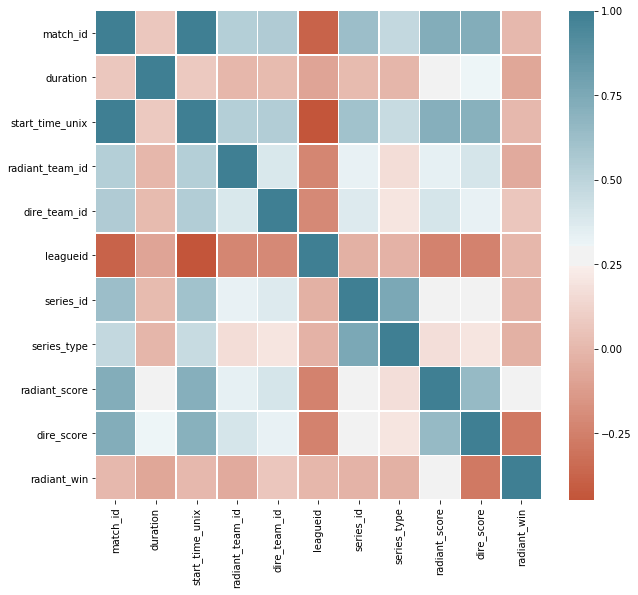

In [70]:
fig, ax = plt.subplots(1,1, figsize=(10,9))
corr_matrix = int_df.corr()
ax = sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, 
                 yticklabels=corr_matrix.columns.values, linewidths=.5,
                cmap=sns.diverging_palette(20, 220, n=200),)

#### From the correlation matrix we can see that there is a pretty strong correlation between the radiant_win and the dire_score. There is some correlation between duratioin and the radiant_win. However the amount of data that we have is limited at the moment as the two columns such as series_id and series_type have a lot of filled values. Therefore, we need to access more data to continue our exploration.

#### Let's analyze what we have with our other dataframes.

In [71]:
prem_df.head()

,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True
1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False
2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False
3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True
4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False


In [72]:
prem_df.league_name.unique()

array(['The International 2019', 'EPICENTER Major 2019',
       'MDL Disneyland® Paris Major', 'DreamLeague Season 11',
       'World Electronic Sports Games 2018-2019', 'The Chongqing Major',
       'The Kuala Lumpur Major', 'WePlay League Season 3',
       'The International 2018', '2017 Mars Dota 2 League',
       'CHINA DOTA2 SUPER MAJOR',
       'ESL One Birmingham 2018 powered by Intel', 'MDL Changsha ',
       'EPICENTER XL', 'Dota2 Asia Championships 2018',
       'DreamLeague season 8', 'ESL One Katowice 2018 powered by Intel',
       'SL i-League Invitational Season 3', 'The Summit 5',
       'ESL One Hamburg 2017', 'The International 2017',
       'NESO 4th National E-Sports ShenZhen Open Tournament- Galaxy Battles',
       'EPICENTER: Moscow Season 2', 'Zotac Cup Masters', 'Kiev Major',
       'Dota 2 Asia Championships 2017', 'Dota Pit League Season Five',
       'ESL One Genting 2017', 'World Cyber Arena 2016 Grand Finals',
       'ESL One Frankfurt 2016',
       'Norther

#### Wow! This is a lot of cups to go through! Before attempting to do this, let's see if we can extract anything else from the dataframe we have been analyzing until this point.

In [77]:
int_df[int_df.league_name=='The International 2019'].start_time.min()

Timestamp('2019-07-07 03:01:41')

#### This data is including the regional qualifiers. Therefore, we could split the data in the actual cup and the regional qualifiers. However, this is too little data, it would be awesome if we could get the open qualifiers data as well. Let's see if we can find that in our prem_df dataframe

In [78]:
prem_df[start_time=="2019-07-03"]

NameError: name 'start_time' is not defined

#### We will repeat the process to rename the start_time column and transform its value to a datetime format

In [79]:
prem_df.rename(columns={'start_time':'start_time_unix'}, inplace=True)
prem_df['start_time'] = pd.to_datetime(prem_df.start_time_unix,unit='s')

In [80]:
prem_df.head(5)

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True,2019-08-25 11:50:17
1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False,2019-08-25 10:54:19
2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False,2019-08-25 09:51:46
3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True,2019-08-25 08:33:12
4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False,2019-08-25 06:12:23


In [91]:
prem_df[(prem_df.start_time>=pd.to_datetime("2019-07-03")) & (prem_df.start_time<=pd.to_datetime('2019-07-07'))]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time


#### So that dataframe does not have any data, let's see if another dataframe which has more data might have it in it.

In [92]:
pro_df.rename(columns={'start_time':'start_time_unix'}, inplace=True)
pro_df['start_time'] = pd.to_datetime(pro_df.start_time_unix,unit='s')

In [93]:
pro_df.head()

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
0,5108885702,2665,1573480047,7314697.0,FIVE BROTHERS,7359442.0,Team Aspirations,11382,Asian DOTA2 Gold Occupation Competition,385455.0,1.0,57,38,True,2019-11-11 13:47:27
1,5108800438,2855,1573476138,7408440.0,Look For Smile,7467648.0,Punch gaming,11382,Asian DOTA2 Gold Occupation Competition,385449.0,1.0,41,61,False,2019-11-11 12:42:18
2,5108735167,2326,1573473148,7467648.0,Punch gaming,7408440.0,Look For Smile,11382,Asian DOTA2 Gold Occupation Competition,385443.0,1.0,42,31,True,2019-11-11 11:52:28
3,5108711156,2619,1573471726,7253435.0,Team Galaxy,6634461.0,Team Sincere,11263,Masters Tournament,385430.0,1.0,39,44,False,2019-11-11 11:28:46
4,5108703089,1431,1573471276,7443956.0,Black Knight,7451388.0,LieYing Team,11407,Elite Cup Season 2,385436.0,1.0,16,41,False,2019-11-11 11:21:16


In [95]:
pro_df[(pro_df.start_time>=pd.to_datetime("2019-07-03")) & (pro_df.start_time<pd.to_datetime('2019-07-07'))]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time
6611,4888082913,3196,1562435991,6902672.0,Neo Blademail,6657336.0,S T M,10219,E-SPORT LEAGUE-DICKYGAMING,345136.0,0.0,48,44,True,2019-07-06 17:59:51
6612,4887948221,3391,1562430636,6981290.0,SURA W1BU,7121540.0,Ilusi,10219,E-SPORT LEAGUE-DICKYGAMING,345112.0,0.0,40,52,False,2019-07-06 16:30:36
6613,4887900775,2144,1562429132,7236969.0,13Link Esa,7121264.0,PANDA GAMING,10375,Meister Division 2019,345100.0,0.0,17,30,False,2019-07-06 16:05:32
6614,4887891198,2213,1562428879,7237001.0,Tisumejik Esport,6930030.0,Venko Fitore,10375,Meister Division 2019,345096.0,0.0,46,38,True,2019-07-06 16:01:19
6615,4887840735,2146,1562427373,6657336.0,S T M,NaN,NaN,10219,E-SPORT LEAGUE-DICKYGAMING,0.0,0.0,38,28,True,2019-07-06 15:36:13
6616,4887839771,1503,1562427350,6438871.0,GoFigure,7101355.0,ROG Titans,10857,ESL India Premiership 2019 - Masters League,345087.0,0.0,8,29,False,2019-07-06 15:35:50
6617,4887750404,2771,1562424859,7121264.0,PANDA GAMING,7237070.0,Wokwokceriya,10375,Meister Division 2019,345070.0,0.0,39,30,True,2019-07-06 14:54:19
6618,4887739742,2501,1562424534,7121169.0,SoulFinder Young,6930030.0,Venko Fitore,10375,Meister Division 2019,345067.0,0.0,25,42,False,2019-07-06 14:48:54
6619,4887717668,2191,1562423918,7236969.0,13Link Esa,6206875.0,LetMeAimyOu,10375,Meister Division 2019,345064.0,0.0,29,15,True,2019-07-06 14:38:38
6620,4887712363,2545,1562423695,5849627.0,Liquid,3780178.0,THE PLAYBOY Gaming,10219,E-SPORT LEAGUE-DICKYGAMING,345062.0,0.0,24,48,False,2019-07-06 14:34:55


#### Ok so we can't find the data for the open qualifiers; however, with the data that we have on the international cup we can split the matches in three different phases: regional qualifiers, group stage and main event. We will assign numerical values to these matches. 1 being for regional qualifiers, 2 for group stage and 3 for main event.

In [97]:
int_df.league_name.unique()

array(['The International 2019', 'The International 2018',
       'The International 2017', 'The International 2016',
       'The International 2015', 'The International 2014',
       'The International 2013 Pass', 'The International 2012'],
      dtype=object)

#### However, now we will figure out how to match the format of previous tournaments with the format we have agreed upon. For examples, the internatioal 2012 only has preliminaries and the main event

In [110]:
print('Earliest Dates for Each competition')
for league in int_df.league_name.unique():
    earliest_date = int_df[int_df.league_name==league].start_time.min()
    radiant_team = int_df[(int_df.league_name==league) & (int_df.start_time==earliest_date)].radiant_name
    dire_team = int_df[(int_df.league_name==league) & (int_df.start_time==earliest_date)].dire_name
    print(league+": "+str(earliest_date))
    print(radiant_team+" vs " + dire_team)

Earliest Dates for Each competition
The International 2019: 2019-07-07 03:01:41
460    BOOM ID vs Mineski
dtype: object
The International 2018: 2018-06-18 19:03:11
861    paiN Gaming vs SG e-sports team
dtype: object
The International 2017: 2017-06-26 02:01:35
1401    Happy  Feet vs Geek Fam
dtype: object
The International 2016: 2016-06-25 02:01:00
1799    Team-Rave vs White Fries Gaming
dtype: object
The International 2015: 2015-05-17 14:29:51
2208    Invasion eSports vs Aces.VN
dtype: object
The International 2014: 2014-05-12 16:15:21
2623    NaN
dtype: object
The International 2013 Pass: 2013-08-02 20:19:22
2786    Quantic|Gaming vs RaTtLeSnAkE. CN GaMiNg
dtype: object
The International 2012: 2012-08-26 16:14:48
2936    mousesports vs Absolute Legends
dtype: object


### The International 2012
#### The data contains the preliminaries and the main cup
### The International 2013
#### The data contains the wildcard match, group stage and main event
### The International 2014
#### The data contains the qualifiers, playoffs and main event
### The International 2015
#### The data contains the semifinals of the regional qualifiers, main qualifiers, wild card, group stage and main event
### The International 2016
#### The data contains the main qualifiers, wild card, group stage and main event
### The International 2017
#### The data contains the main qualifiers, group stage and main event
### The International 2018
#### The data contains the regional qualifiers, group stage and main event
### The International 2019
#### The data contains the regional qualifiers, group stage and main event

#### As the most recent 4 cups can be divided in 3 diffferent groups, we will preserve that division for all cups. For The International 2012 the preliminaries will be coded as 2 and the main cup as 3. For The International 2013, wildcard match and group stage will be coded as 2 and main event as 3. The International 2014, qualifiers as 1, playoffs as 2 and main event as 3. The International 2015 will have regional qualifiers and main qualifiers as 1, wild card and group stage as 2 and main event as 3. The International 2016 will have the main qualifiers as 1, wild card and group stage as 2 and main event as 3. The International 2017 wiill have the main qualifiers as 1, group stage as 2 and main event as 3. The Internationals 2018 and 2019 will follow the same trend. 

In [126]:
def set_value(gdate):
    # -----The International 2012 ------
    if ((gdate >= pd.to_datetime('2012-08-26')) & (gdate<pd.to_datetime('2012-08-31'))):
        return 2
    elif ((gdate >= pd.to_datetime('2012-08-31')) & (gdate<pd.to_datetime('2012-09-03'))):
        return 3
#     --------The International 2013-------
    elif ((gdate >= pd.to_datetime('2013-08-02')) & (gdate<pd.to_datetime('2013-08-06'))):
        return 2
    elif ((gdate >= pd.to_datetime('2013-08-07')) & (gdate<pd.to_datetime('2013-08-12'))):
        return 3
#     --------The International 2014-------
    elif ((gdate >= pd.to_datetime('2014-05-12')) & (gdate<pd.to_datetime('2014-05-28'))):
        return 1
    elif ((gdate >= pd.to_datetime('2014-07-08')) & (gdate<pd.to_datetime('2014-08-15'))):
        return 2
    elif ((gdate >= pd.to_datetime('2014-07-18')) & (gdate<pd.to_datetime('2014-07-22'))):
        return 3
#     ---------The International 2015-------
    elif ((gdate >= pd.to_datetime('2015-05-17')) & (gdate<pd.to_datetime('2015-06-02'))):
        return 1
    elif ((gdate >= pd.to_datetime('2015-07-26')) & (gdate<pd.to_datetime('2015-07-31'))):
        return 2
    elif ((gdate >= pd.to_datetime('2015-08-03')) & (gdate<pd.to_datetime('2015-08-09'))):
        return 3
#     ---------The International 2016---------
    elif ((gdate >= pd.to_datetime('2016-06-25')) & (gdate<pd.to_datetime('2016-06-29'))):
        return 1
    elif ((gdate >= pd.to_datetime('2016-08-02')) & (gdate<pd.to_datetime('2016-08-06'))):
        return 2
    elif ((gdate >= pd.to_datetime('2016-08-08')) & (gdate<pd.to_datetime('2016-08-14'))):
        return 2
#     ----------The International 2017---------
    elif ((gdate >= pd.to_datetime('2017-06-26')) & (gdate<pd.to_datetime('2017-07-01'))):
        return 1
    elif ((gdate >= pd.to_datetime('2017-08-02')) & (gdate<pd.to_datetime('2017-08-06'))):
        return 2
    elif ((gdate >= pd.to_datetime('2017-08-07')) & (gdate<pd.to_datetime('2017-08-13'))):
        return 3
#     ----------The International 2018----------
    elif ((gdate >= pd.to_datetime('2018-06-18')) & (gdate<pd.to_datetime('2018-06-26'))):
        return 1
    elif ((gdate >= pd.to_datetime('2018-08-15')) & (gdate<pd.to_datetime('2018-08-19'))):
        return 2
    elif ((gdate >= pd.to_datetime('2018-08-20')) & (gdate<pd.to_datetime('2018-08-26'))):
        return 3
#     ---------The International 2019----------
    elif ((gdate >= pd.to_datetime('2019-07-07')) & (gdate<pd.to_datetime('2019-07-16'))):
        return 1
    elif ((gdate >= pd.to_datetime('2019-08-15')) & (gdate<pd.to_datetime('2019-08-19'))):
        return 2
    elif ((gdate >= pd.to_datetime('2019-08-20')) & (gdate<pd.to_datetime('2019-08-26'))):
        return 3

int_df['match_type'] = int_df.start_time.apply(set_value)

In [130]:
int_df[int_df.match_type.isna()]

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time,match_type
193,4904311356,1964,1563154253,6288801.0,J.Storm,6214538.0,Newbee,10749,The International 2019,348164.0,2.0,6,48,False,2019-07-15 01:30:53,NaN
194,4904261164,1901,1563149964,6214538.0,Newbee,6288801.0,J.Storm,10749,The International 2019,348164.0,2.0,32,4,True,2019-07-15 00:19:24,NaN
461,4080856812,2188,1535249730,15.0,PSG.LGD,2586976.0,OG,9870,The International 2018,0.0,0.0,34,35,False,2018-08-26 02:15:30,NaN
462,4080778303,3921,1535243738,15.0,PSG.LGD,2586976.0,OG,9870,The International 2018,0.0,0.0,58,49,False,2018-08-26 00:35:38,NaN
508,4067049273,1632,1534639865,5229127.0,Winstrike,5.0,INVICTUS GAMING,9870,The International 2018,0.0,0.0,18,15,True,2018-08-19 00:51:05,NaN
509,4067035268,2530,1534638635,1838315.0,Team Secret,1375614.0,Newbee,9870,The International 2018,0.0,0.0,19,19,True,2018-08-19 00:30:35,NaN
862,3372726385,2719,1502583177,1375614.0,Newbee,2163.0,Team Liquid,5401,The International 2017,0.0,0.0,17,27,False,2017-08-13 00:12:57,NaN
1402,2569610900,2368,1471142574,2512249.0,123,1836806.0,the wings gaming,4664,The International 2016,0.0,0.0,27,30,False,2016-08-14 02:42:54,NaN
1403,2569531910,2729,1471138064,1836806.0,the wings gaming,2512249.0,123,4664,The International 2016,0.0,0.0,49,24,True,2016-08-14 01:27:44,NaN
1404,2569470828,2440,1471133851,1836806.0,the wings gaming,2512249.0,123,4664,The International 2016,0.0,0.0,27,15,True,2016-08-14 00:17:31,NaN


#### I don't really know what these matches are, I can't find them online neither, so I will just assign them the match_type 0

In [133]:
int_df.match_type.fillna(0, inplace=True)

In [134]:
int_df.head()

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win,start_time,match_type
0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True,2019-08-25 11:50:17,3.0
1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False,2019-08-25 10:54:19,3.0
2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False,2019-08-25 09:51:46,3.0
3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True,2019-08-25 08:33:12,3.0
4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False,2019-08-25 06:12:23,3.0


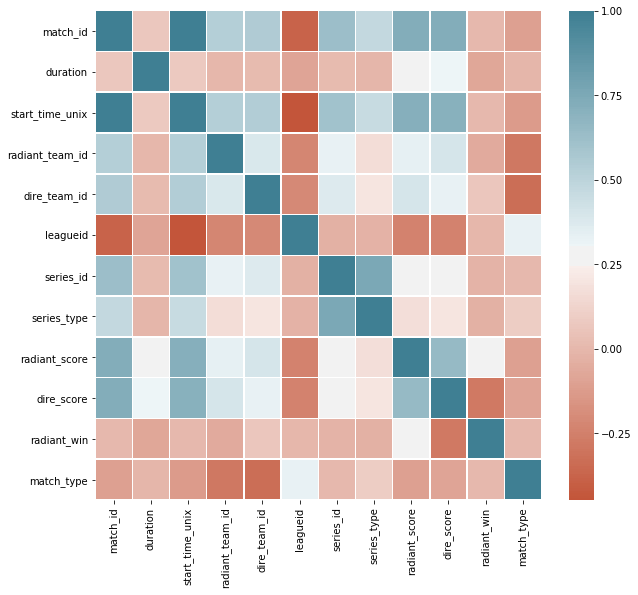

In [135]:
fig, ax = plt.subplots(1,1, figsize=(10,9))
corr_matrix = int_df.corr()
ax = sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, 
                 yticklabels=corr_matrix.columns.values, linewidths=.5,
                cmap=sns.diverging_palette(20, 220, n=200),)

In [136]:
int_df['score_diff'] = int_df.radiant_score - int_df.dire_score

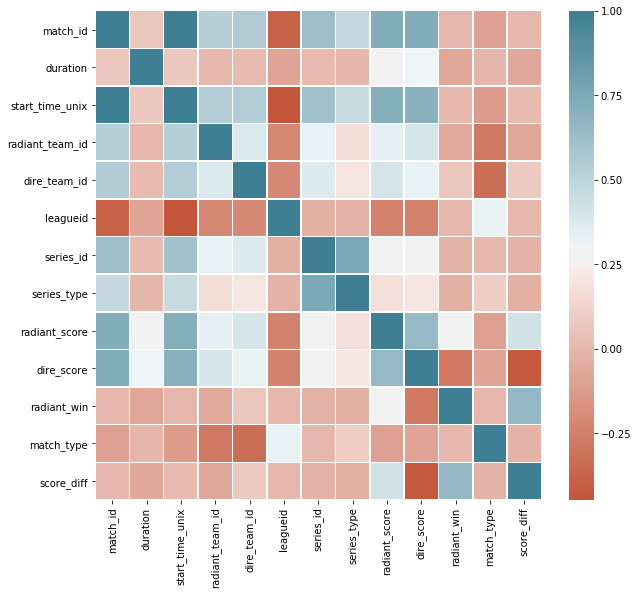

In [137]:
fig, ax = plt.subplots(1,1, figsize=(10,9))
corr_matrix = int_df.corr()
ax = sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, 
                 yticklabels=corr_matrix.columns.values, linewidths=.5,
                cmap=sns.diverging_palette(20, 220, n=200),)

In [142]:
bint_df = pd.read_csv('https://dota-match-ids.s3.amazonaws.com/raw_match_csvs/international_raw_match_full.csv',
                     usecols=['match_id','barracks_status_dire','barracks_status_radiant','first_blood_time','game_mode',
                             'picks_bans','tower_status_dire','tower_status_radiant',
                             'version','radiant_team','dire_team','patch','region'])

In [143]:
bint_df.head()

,barracks_status_dire,barracks_status_radiant,dire_team,first_blood_time,game_mode,match_id,patch,picks_bans,radiant_team,region,tower_status_dire,tower_status_radiant,version
0,51,63,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",121,2,4986461644,41,"[{'is_pick': False, 'hero_id': 52, 'team': 0, ...","{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",NaN,1926,1972,21.0
1,63,15,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",282,2,4986362254,41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,2046,1568,21.0
2,63,3,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",46,2,4986260666,41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,2038,1540,21.0
3,51,2,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",124,2,4986133311,41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,260,1536,21.0
4,63,0,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",82,2,4985891168,41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...",NaN,2046,0,21.0


In [209]:
mint_df = pd.merge(int_df,bint_df,on='match_id',how='inner').copy()

In [210]:
mint_df.head()

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,...,dire_team,first_blood_time,game_mode,patch,picks_bans,radiant_team,region,tower_status_dire,tower_status_radiant,version
0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,...,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",121,2,41,"[{'is_pick': False, 'hero_id': 52, 'team': 0, ...","{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",NaN,1926,1972,21.0
1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,...,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",282,2,41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,2046,1568,21.0
2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,...,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",46,2,41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,2038,1540,21.0
3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,...,"{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",124,2,41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,260,1536,21.0
4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,...,"{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",82,2,41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...",NaN,2046,0,21.0


In [211]:
mint_df.columns.values

array(['match_id', 'duration', 'start_time_unix', 'radiant_team_id',
       'radiant_name', 'dire_team_id', 'dire_name', 'leagueid',
       'league_name', 'series_id', 'series_type', 'radiant_score',
       'dire_score', 'radiant_win', 'start_time', 'match_type',
       'score_diff', 'barracks_status_dire', 'barracks_status_radiant',
       'dire_team', 'first_blood_time', 'game_mode', 'patch',
       'picks_bans', 'radiant_team', 'region', 'tower_status_dire',
       'tower_status_radiant', 'version'], dtype=object)

In [212]:
mint_df.isna().any()

match_id                   False
duration                   False
start_time_unix            False
radiant_team_id            False
radiant_name                True
dire_team_id               False
dire_name                   True
leagueid                   False
league_name                False
series_id                  False
series_type                False
radiant_score              False
dire_score                 False
radiant_win                False
start_time                 False
match_type                 False
score_diff                 False
barracks_status_dire       False
barracks_status_radiant    False
dire_team                  False
first_blood_time           False
game_mode                  False
patch                      False
picks_bans                  True
radiant_team               False
region                      True
tower_status_dire          False
tower_status_radiant       False
version                     True
dtype: bool

In [213]:
mint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2890
Data columns (total 29 columns):
match_id                   2891 non-null int64
duration                   2891 non-null int64
start_time_unix            2891 non-null int64
radiant_team_id            2891 non-null float64
radiant_name               2765 non-null object
dire_team_id               2891 non-null float64
dire_name                  2764 non-null object
leagueid                   2891 non-null int64
league_name                2891 non-null object
series_id                  2891 non-null float64
series_type                2891 non-null float64
radiant_score              2891 non-null int64
dire_score                 2891 non-null int64
radiant_win                2891 non-null bool
start_time                 2891 non-null datetime64[ns]
match_type                 2891 non-null float64
score_diff                 2891 non-null int64
barracks_status_dire       2891 non-null int64
barracks_status_radiant   

In [214]:
mint_df[mint_df.region.isna()].league_name.unique()

array(['The International 2019', 'The International 2014',
       'The International 2013 Pass'], dtype=object)

In [215]:
mint_df[mint_df.league_name=='The International 2019'].region.describe()

count    249.000000
mean       7.955823
std        5.897824
min        2.000000
25%        3.000000
50%        5.000000
75%       10.000000
max       20.000000
Name: region, dtype: float64

In [216]:
mint_df.loc[mint_df.league_name=='The International 2019','region'].fillna(8,inplace=True)

In [217]:
mint_df[mint_df.league_name=='The International 2014'].region.describe()

count    410.000000
mean       4.404878
std        5.619297
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       18.000000
Name: region, dtype: float64

In [225]:
mint_df.loc[np.isnan(mint_df.league_name=='The International 2014'),'region'] = 6

In [219]:
mint_df[mint_df.league_name=='The International 2013 Pass'].region.describe()

count    151.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: region, dtype: float64

In [220]:
mint_df.loc[mint_df.league_name=='The International 2013 Pass','region'].fillna(1,inplace=True)

In [221]:
mint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2890
Data columns (total 29 columns):
match_id                   2891 non-null int64
duration                   2891 non-null int64
start_time_unix            2891 non-null int64
radiant_team_id            2891 non-null float64
radiant_name               2765 non-null object
dire_team_id               2891 non-null float64
dire_name                  2764 non-null object
leagueid                   2891 non-null int64
league_name                2891 non-null object
series_id                  2891 non-null float64
series_type                2891 non-null float64
radiant_score              2891 non-null int64
dire_score                 2891 non-null int64
radiant_win                2891 non-null bool
start_time                 2891 non-null datetime64[ns]
match_type                 2891 non-null float64
score_diff                 2891 non-null int64
barracks_status_dire       2891 non-null int64
barracks_status_radiant   

In [226]:
mint_df[mint_df.region.isna()].league_name.unique()

array(['The International 2019', 'The International 2014',
       'The International 2013 Pass'], dtype=object)

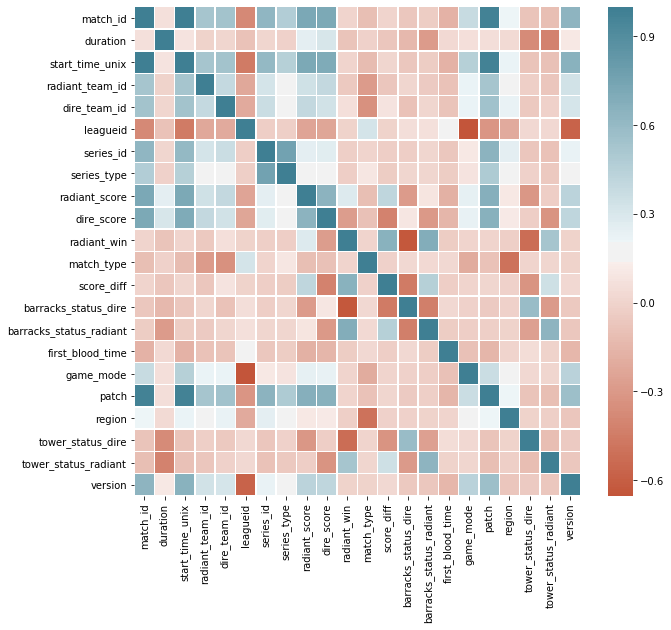

In [227]:
fig, ax = plt.subplots(1,1, figsize=(10,9))
corr_matrix = mint_df.corr()
ax = sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, 
                 yticklabels=corr_matrix.columns.values, linewidths=.5,
                cmap=sns.diverging_palette(20, 220, n=200),)

#### Lets explore the picks_bans feature

In [254]:
import ast
mint_df.picks_bans[3][1:-1]

"{'is_pick': False, 'hero_id': 52, 'team': 1, 'order': 0, 'ord': 0, 'match_id': 4986133311}, {'is_pick': False, 'hero_id': 97, 'team': 0, 'order': 1, 'ord': 1, 'match_id': 4986133311}, {'is_pick': False, 'hero_id': 68, 'team': 1, 'order': 2, 'ord': 2, 'match_id': 4986133311}, {'is_pick': False, 'hero_id': 91, 'team': 0, 'order': 3, 'ord': 3, 'match_id': 4986133311}, {'is_pick': False, 'hero_id': 16, 'team': 1, 'order': 4, 'ord': 4, 'match_id': 4986133311}, {'is_pick': False, 'hero_id': 73, 'team': 0, 'order': 5, 'ord': 5, 'match_id': 4986133311}, {'is_pick': True, 'hero_id': 58, 'team': 1, 'order': 6, 'ord': 6, 'match_id': 4986133311}, {'is_pick': True, 'hero_id': 29, 'team': 0, 'order': 7, 'ord': 7, 'match_id': 4986133311}, {'is_pick': True, 'hero_id': 66, 'team': 0, 'order': 8, 'ord': 8, 'match_id': 4986133311}, {'is_pick': True, 'hero_id': 103, 'team': 1, 'order': 9, 'ord': 9, 'match_id': 4986133311}, {'is_pick': False, 'hero_id': 100, 'team': 1, 'order': 10, 'ord': 10, 'match_id': 

In [255]:
ast.literal_eval(mint_df.picks_bans[3][1:-1])[0]['team']

1

In [332]:
mint_df.dropna(subset=['picks_bans'],inplace=True)

In [333]:
mint_df.tail(10)

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,...,first_blood_time,game_mode,patch,picks_bans,radiant_team,region,tower_status_dire,tower_status_radiant,version,radiant_bans_first
2730,262312446,1817,1375550794,15.0,PSG.LGD,497529.0,Invasion MUFC,65006,The International 2013 Pass,0.0,...,137,2,8,"[{'is_pick': False, 'hero_id': 66, 'team': 0, ...","{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...",1.0,1920,1972,20.0,0.0
2731,262303778,826,1375550029,142.0,Team Dignitas,7.0,DK,65006,The International 2013 Pass,0.0,...,50,2,8,"[{'is_pick': False, 'hero_id': 76, 'team': 0, ...","{'team_id': 142, 'name': 'Team Dignitas', 'tag...",1.0,1983,1830,20.0,0.0
2732,262283296,2575,1375548045,26.0,mousesports,2.0,Zenith,65006,The International 2013 Pass,0.0,...,44,2,8,"[{'is_pick': False, 'hero_id': 15, 'team': 1, ...","{'team_id': 26, 'name': 'mousesports', 'tag': ...",1.0,4,1846,20.0,1.0
2733,262281327,1794,1375547918,497529.0,Invasion MUFC,15.0,PSG.LGD,65006,The International 2013 Pass,0.0,...,237,2,8,"[{'is_pick': False, 'hero_id': 55, 'team': 0, ...","{'team_id': 497529, 'name': 'Invasion MUFC', '...",1.0,1975,1792,20.0,0.0
2734,262279207,2774,1375547823,350190.0,Fnatic,36.0,Natus Vincere,65006,The International 2013 Pass,0.0,...,197,2,8,"[{'is_pick': False, 'hero_id': 63, 'team': 0, ...","{'team_id': 350190, 'name': 'Fnatic', 'tag': '...",1.0,1540,1846,20.0,0.0
2735,262276878,1215,1375547597,7.0,DK,142.0,Team Dignitas,65006,The International 2013 Pass,0.0,...,136,2,8,"[{'is_pick': False, 'hero_id': 91, 'team': 0, ...","{'team_id': 7, 'name': 'DK', 'tag': 'DK', 'log...",1.0,1828,2046,20.0,0.0
2736,261498337,2080,1375486529,496774.0,RaTtLeSnAkE. CN GaMiNg,680683.0,Quantic|Gaming,65006,The International 2013 Pass,0.0,...,212,2,8,"[{'is_pick': False, 'hero_id': 73, 'team': 1, ...","{'team_id': 496774, 'name': 'RaTtLeSnAkE. CN G...",1.0,1540,2047,20.0,1.0
2737,261471219,2551,1375482669,680683.0,Quantic|Gaming,496774.0,RaTtLeSnAkE. CN GaMiNg,65006,The International 2013 Pass,0.0,...,188,2,8,"[{'is_pick': False, 'hero_id': 73, 'team': 0, ...","{'team_id': 680683, 'name': 'Quantic|Gaming', ...",1.0,1974,1540,20.0,0.0
2738,261440616,2415,1375478932,496774.0,RaTtLeSnAkE. CN GaMiNg,680683.0,Quantic|Gaming,65006,The International 2013 Pass,0.0,...,160,2,8,"[{'is_pick': False, 'hero_id': 73, 'team': 1, ...","{'team_id': 496774, 'name': 'RaTtLeSnAkE. CN G...",1.0,1974,260,20.0,1.0
2739,261406872,2505,1375474762,680683.0,Quantic|Gaming,496774.0,RaTtLeSnAkE. CN GaMiNg,65006,The International 2013 Pass,0.0,...,293,2,8,"[{'is_pick': False, 'hero_id': 73, 'team': 0, ...","{'team_id': 680683, 'name': 'Quantic|Gaming', ...",1.0,1972,1792,20.0,0.0


In [339]:
def bans_first(data):
    tfirst = ast.literal_eval(data)[0]['team']
    if tfirst == 1:
        return True
    else:
        return False
    
mint_df['radiant_bans_first'] = mint_df.picks_bans.apply(bans_first)

In [340]:
mint_df.tail(10)

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,...,first_blood_time,game_mode,patch,picks_bans,radiant_team,region,tower_status_dire,tower_status_radiant,version,radiant_bans_first
2730,262312446,1817,1375550794,15.0,PSG.LGD,497529.0,Invasion MUFC,65006,The International 2013 Pass,0.0,...,137,2,8,"[{'is_pick': False, 'hero_id': 66, 'team': 0, ...","{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...",1.0,1920,1972,20.0,False
2731,262303778,826,1375550029,142.0,Team Dignitas,7.0,DK,65006,The International 2013 Pass,0.0,...,50,2,8,"[{'is_pick': False, 'hero_id': 76, 'team': 0, ...","{'team_id': 142, 'name': 'Team Dignitas', 'tag...",1.0,1983,1830,20.0,False
2732,262283296,2575,1375548045,26.0,mousesports,2.0,Zenith,65006,The International 2013 Pass,0.0,...,44,2,8,"[{'is_pick': False, 'hero_id': 15, 'team': 1, ...","{'team_id': 26, 'name': 'mousesports', 'tag': ...",1.0,4,1846,20.0,True
2733,262281327,1794,1375547918,497529.0,Invasion MUFC,15.0,PSG.LGD,65006,The International 2013 Pass,0.0,...,237,2,8,"[{'is_pick': False, 'hero_id': 55, 'team': 0, ...","{'team_id': 497529, 'name': 'Invasion MUFC', '...",1.0,1975,1792,20.0,False
2734,262279207,2774,1375547823,350190.0,Fnatic,36.0,Natus Vincere,65006,The International 2013 Pass,0.0,...,197,2,8,"[{'is_pick': False, 'hero_id': 63, 'team': 0, ...","{'team_id': 350190, 'name': 'Fnatic', 'tag': '...",1.0,1540,1846,20.0,False
2735,262276878,1215,1375547597,7.0,DK,142.0,Team Dignitas,65006,The International 2013 Pass,0.0,...,136,2,8,"[{'is_pick': False, 'hero_id': 91, 'team': 0, ...","{'team_id': 7, 'name': 'DK', 'tag': 'DK', 'log...",1.0,1828,2046,20.0,False
2736,261498337,2080,1375486529,496774.0,RaTtLeSnAkE. CN GaMiNg,680683.0,Quantic|Gaming,65006,The International 2013 Pass,0.0,...,212,2,8,"[{'is_pick': False, 'hero_id': 73, 'team': 1, ...","{'team_id': 496774, 'name': 'RaTtLeSnAkE. CN G...",1.0,1540,2047,20.0,True
2737,261471219,2551,1375482669,680683.0,Quantic|Gaming,496774.0,RaTtLeSnAkE. CN GaMiNg,65006,The International 2013 Pass,0.0,...,188,2,8,"[{'is_pick': False, 'hero_id': 73, 'team': 0, ...","{'team_id': 680683, 'name': 'Quantic|Gaming', ...",1.0,1974,1540,20.0,False
2738,261440616,2415,1375478932,496774.0,RaTtLeSnAkE. CN GaMiNg,680683.0,Quantic|Gaming,65006,The International 2013 Pass,0.0,...,160,2,8,"[{'is_pick': False, 'hero_id': 73, 'team': 1, ...","{'team_id': 496774, 'name': 'RaTtLeSnAkE. CN G...",1.0,1974,260,20.0,True
2739,261406872,2505,1375474762,680683.0,Quantic|Gaming,496774.0,RaTtLeSnAkE. CN GaMiNg,65006,The International 2013 Pass,0.0,...,293,2,8,"[{'is_pick': False, 'hero_id': 73, 'team': 0, ...","{'team_id': 680683, 'name': 'Quantic|Gaming', ...",1.0,1972,1792,20.0,False


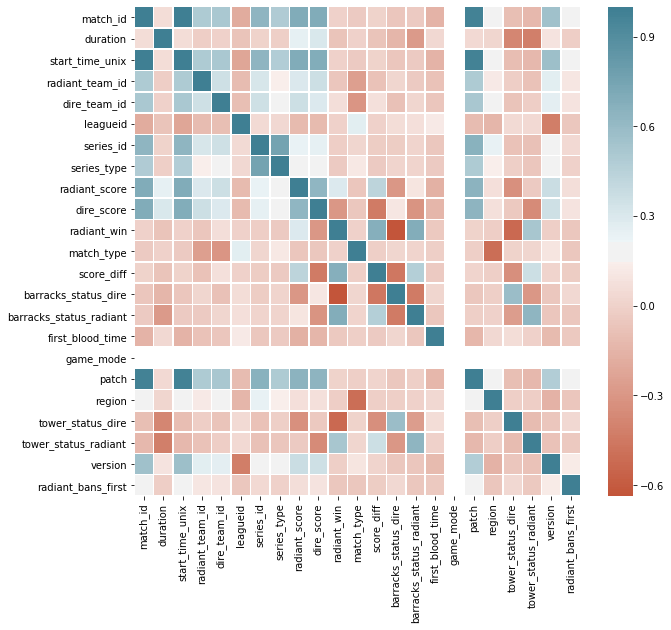

In [348]:
fig, ax = plt.subplots(1,1, figsize=(10,9))
corr_matrix = mint_df.corr()
ax = sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, 
                 yticklabels=corr_matrix.columns.values, linewidths=.5,
                cmap=sns.diverging_palette(20, 220, n=200),)

In [343]:
mint_df.game_mode.unique()

array([2])

In [344]:
mint_df.head()

,match_id,duration,start_time_unix,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,...,first_blood_time,game_mode,patch,picks_bans,radiant_team,region,tower_status_dire,tower_status_radiant,version,radiant_bans_first
0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,...,121,2,41,"[{'is_pick': False, 'hero_id': 52, 'team': 0, ...","{'team_id': 2586976, 'name': 'OG', 'tag': 'OG'...",NaN,1926,1972,21.0,False
1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,...,282,2,41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,2046,1568,21.0,False
2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,...,46,2,41,"[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,2038,1540,21.0,False
3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,...,124,2,41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...",NaN,260,1536,21.0,True
4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,...,82,2,41,"[{'is_pick': False, 'hero_id': 52, 'team': 1, ...","{'team_id': 15, 'name': 'PSG.LGD', 'tag': 'PSG...",NaN,2046,0,21.0,True


In [345]:
mint_df.radiant_name.unique()

array(['OG', 'Team Liquid', 'PSG.LGD', 'Team Secret', 'Vici Gaming',
       'Infamous Gaming', 'Royal Never Give Up', 'Evil Geniuses',
       'Mineski', 'Newbee', 'TNC Predator', 'Natus Vincere',
       'KEEN GAMING', 'Virtus.pro', 'Ninjas in Pyjamas', 'Fnatic',
       'Alliance', 'Chaos Esports Club', 'J.Storm', 'beastcoast',
       'The Final Tribe', 'CDEC ', 'Hippomaniacs', 'EHOME', 'Kookaburra',
       'INVICTUS GAMING', 'Team Xolotl', 'compLexity Gaming',
       'Black Sheep!', 'Old Suck Gaming', 'Team Singularity', 'Bald',
       'Anti-MagE-', 'Team Aster', 'Team Serenity', 'Team Sirius',
       'paiN Gaming', 'Winstrike Team', 'Vega Squadron', 'Team Jinesbrus',
       'Thunder Predator', 'EGOBOYS', 'Team Empire', 'AMPLFY', 'Furia',
       'SG e-sports', 'FlyToMoon', 'Team Spirit', 'Nemiga Gaming',
       'Gambit Esports', 'RESURGENCE', 'BOOM ID', 'Team EVOS',
       'Gorillaz-Pride', '496 Gaming', 'Adroit', nan, 'VGJ Storm',
       'Winstrike', 'VGJ Thunder', 'Immortals', 'Wind 

In [347]:
mint_df[mint_df.radiant_name == 'UNKNOWN #####'].start_time

2075   2015-05-27 05:05:40
2078   2015-05-27 04:04:19
2081   2015-05-27 01:47:33
2092   2015-05-26 18:24:02
2093   2015-05-26 17:01:08
2120   2015-05-25 22:18:54
2121   2015-05-25 21:40:56
2155   2015-05-18 05:24:31
2157   2015-05-18 03:03:46
Name: start_time, dtype: datetime64[ns]